In [2]:
import sys
print("Python executable:", sys.executable)


Python executable: /Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/.venv/bin/python


In [5]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from process_movella import load_movella, get_position
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter

In [6]:
IN_DIR = Path("uploads/2025-07-22 Euler Angles")
OUT_DIR = Path("out")

# make the output directory if it does not exit
if not OUT_DIR.exists():
    OUT_DIR.mkdir()

In [7]:
# Constants

# Hoop specifications
d = 83./100     # m, hoop diameter
r = d/2         # m, hoop radius
m = 0.25        # kg, mass of hoop

# Gravity
g = 9.81        # m/s^2, gravitational acceleration

# Time setup
f = 120         # Hz, sampling frequency
dt = 1 / f      # s, sample duration

# Inertias in corotational basis
Ixx = 0.5*m*r**2
Iyy = 0.5*m*r**2
Izz = m*r**2

In [8]:
# Reading sensor data

# OL: left side of hoop
# OR: right side of hoop
# IT: on hip, above hoop (on right side of waist belt)
# IL: on hip, above hoop (on left side of waist belt)
# IB: on hip, below hoop (in right pocket)
OL_hoop_file = sorted(list(IN_DIR.glob("OL_*.csv")))[0]
OR_hoop_file = sorted(list(IN_DIR.glob("OR_*.csv")))[0]
IT_hoop_file = sorted(list(IN_DIR.glob("IT_*.csv")))[0]
IL_hoop_file = sorted(list(IN_DIR.glob("IL_*.csv")))[0]
IB_hoop_file = sorted(list(IN_DIR.glob("IB_*.csv")))[0]

lead_time_val = 0

OL_hoop_data = load_movella(OL_hoop_file, lead_time=lead_time_val)
OR_hoop_data = load_movella(OR_hoop_file, lead_time=lead_time_val)
IT_hoop_data = load_movella(IT_hoop_file, lead_time=lead_time_val)
IL_hoop_data = load_movella(IL_hoop_file, lead_time=lead_time_val)
IB_hoop_data = load_movella(IB_hoop_file, lead_time=lead_time_val)

time, OL_accel_x, OL_accel_y, OL_accel_z, OL_phi, OL_theta, OL_psi, OL_wx, OL_wy, OL_wz = OL_hoop_data.T
_, OR_accel_x, OR_accel_y, OR_accel_z, OR_phi, OR_theta, OR_psi, OR_wx, OR_wy, OR_wz = OR_hoop_data.T
_, IT_accel_x, IT_accel_y, IT_accel_z, IT_phi, IT_theta, IT_psi, IT_wx, IT_wy, IT_wz = IT_hoop_data.T
_, IL_accel_x, IL_accel_y, IL_accel_z, IL_phi, IL_theta, IL_psi, IL_wx, IL_wy, IL_wz = IL_hoop_data.T
_, IB_accel_x, IB_accel_y, IB_accel_z, IB_phi, IB_theta, IB_psi, IB_wx, IB_wy, IB_wz = IB_hoop_data.T

# time step
dt = time[1]-time[0]

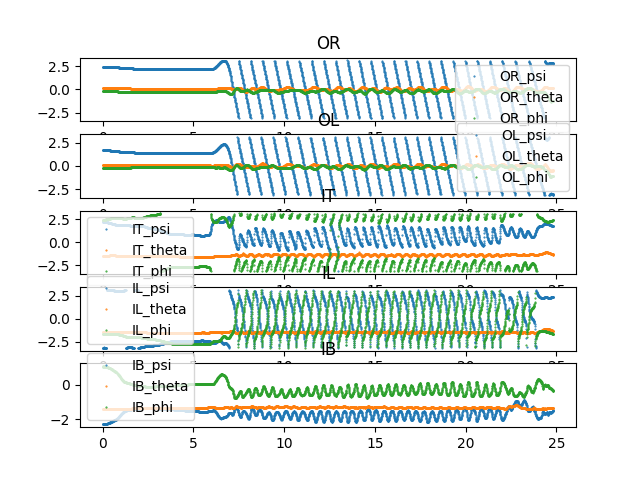

In [46]:
# Plotting raw euler angle data
%matplotlib widget

# re: raw euler
fig_re, ax_re = plt.subplots(5)  # Creates a 3x1 grid of Axes

ax_re[0].set_title('OR')
ax_re[0].plot(time, OR_psi,'.', label='OR_psi', markersize=1)
ax_re[0].plot(time, OR_theta,'.', label='OR_theta', markersize=1)
ax_re[0].plot(time, OR_phi,'.', label='OR_phi', markersize=1)
ax_re[0].legend()

ax_re[1].set_title('OL')
ax_re[1].plot(time, OL_psi,'.', label='OL_psi', markersize=1)
ax_re[1].plot(time, OL_theta,'.', label='OL_theta', markersize=1)
ax_re[1].plot(time, OL_phi,'.', label='OL_phi', markersize=1)
ax_re[1].legend()

ax_re[2].set_title('IT')
ax_re[2].plot(time, IT_psi,'.', label='IT_psi', markersize=1)
ax_re[2].plot(time, IT_theta,'.', label='IT_theta', markersize=1)
ax_re[2].plot(time, IT_phi,'.', label='IT_phi', markersize=1)
ax_re[2].legend()

ax_re[3].set_title('IL')
ax_re[3].plot(time, IL_psi,'.', label='IL_psi', markersize=1)
ax_re[3].plot(time, IL_theta,'.', label='IL_theta', markersize=1)
ax_re[3].plot(time, IL_phi,'.', label='IL_phi', markersize=1)
ax_re[3].legend()

ax_re[4].set_title('IB')
ax_re[4].plot(time, IB_psi,'.', label='IB_psi', markersize=1)
ax_re[4].plot(time, IB_theta,'.', label='IB_theta', markersize=1)
ax_re[4].plot(time, IB_phi,'.', label='IB_phi', markersize=1)
ax_re[4].legend()

Zoom into IT, IL, and IB data. Looks like all angles are periodic with same period. Same for hoop. IT comes in bursts, then does down, IL less no, IB not so. See in later plot that derivative of IB is order 10, whereas derivatives of IT and IL are order 100. 

What does the 3-2-1 Euler angle set look like for the hip? Does it make sense that theta is almost zero?

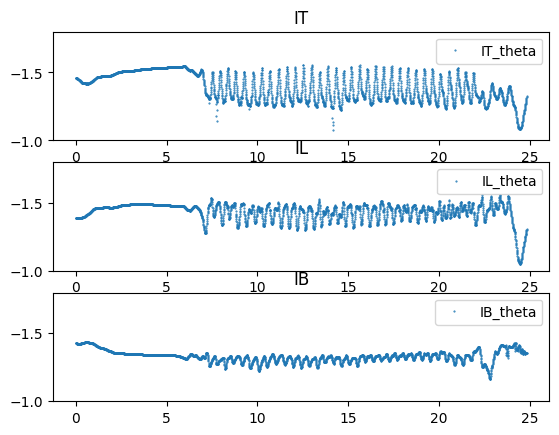

In [10]:
# Plotting theta of the hip on its own

# Plotting raw euler angle data
# th: theta hip
fig_th, ax_th = plt.subplots(3)  # Creates a 3x1 grid of Axes


ax_th[0].set_title('IT')
ax_th[0].plot(time, IT_theta,'.', label='IT_theta', markersize=1)
ax_th[0].set_ylim(-1,-1.8) 
ax_th[0].legend()

ax_th[1].set_title('IL')
ax_th[1].plot(time, IL_theta,'.', label='IL_theta', markersize=1)
ax_th[1].set_ylim(-1,-1.8) 
ax_th[1].legend()

ax_th[2].set_title('IB')
ax_th[2].plot(time, IB_theta,'.', label='IB_theta', markersize=1)
ax_th[2].set_ylim(-1,-1.8) 
ax_th[2].legend()

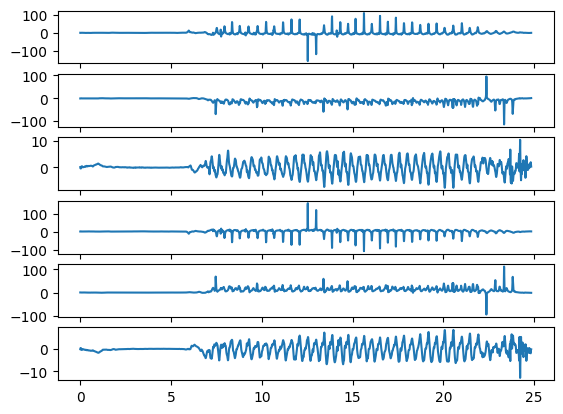

In [11]:
# Derivatives of psi and phi of hip

IT_psi_unwrapped = np.unwrap(IT_psi)
IL_psi_unwrapped = np.unwrap(IL_psi)
IB_psi_unwrapped = np.unwrap(IB_psi)
IT_phi_unwrapped = np.unwrap(IT_phi)
IL_phi_unwrapped = np.unwrap(IL_phi)
IB_phi_unwrapped = np.unwrap(IB_phi)

IT_dpsi_dt = np.gradient(IT_psi_unwrapped, dt)
IL_dpsi_dt = np.gradient(IL_psi_unwrapped, dt)
IB_dpsi_dt = np.gradient(IB_psi_unwrapped, dt)
IT_dphi_dt = np.gradient(IT_phi_unwrapped, dt)
IL_dphi_dt = np.gradient(IL_phi_unwrapped, dt)
IB_dphi_dt = np.gradient(IB_phi_unwrapped, dt)

fig_dhip, ax_dhip = plt.subplots(6)
ax_dhip[0].plot(time, IT_dpsi_dt)
ax_dhip[1].plot(time, IL_dpsi_dt)
ax_dhip[2].plot(time, IB_dpsi_dt)
ax_dhip[3].plot(time, IT_dphi_dt)
ax_dhip[4].plot(time, IL_dphi_dt)
ax_dhip[5].plot(time, IB_dphi_dt)

For the signals on the upper hip (belt), you see bursts of fast motion of the angles psi and psi. The rest of the motion is slow. This is evidenced by the derivatives. Lower hip data looks different.

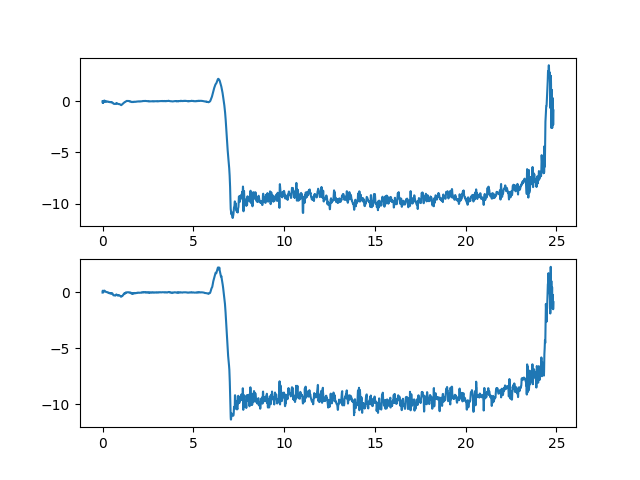

In [47]:
# Derivatives of psi of hoop
%matplotlib widget

OL_psi_unwrapped = np.unwrap(OL_psi)
OR_psi_unwrapped = np.unwrap(OR_psi)

OL_dpsi_dt = np.gradient(OL_psi_unwrapped, dt)
OR_dpsi_dt = np.gradient(OR_psi_unwrapped, dt)

fig_dpsi, ax_psi = plt.subplots(2)
ax_psi[0].plot(time, OL_dpsi_dt)
ax_psi[1].plot(time, OR_dpsi_dt)

We can detect when steady hula hoop motion is happening by looking at the psi-dot time series. psi is almost constant during steady hula hooping. You see how initially the hula hooper turns the hoop opposite to the directions at which it will rotate, then gives a high initial angular velocity. The initial angular velocity psidot will be sustained by the hoop until failure.

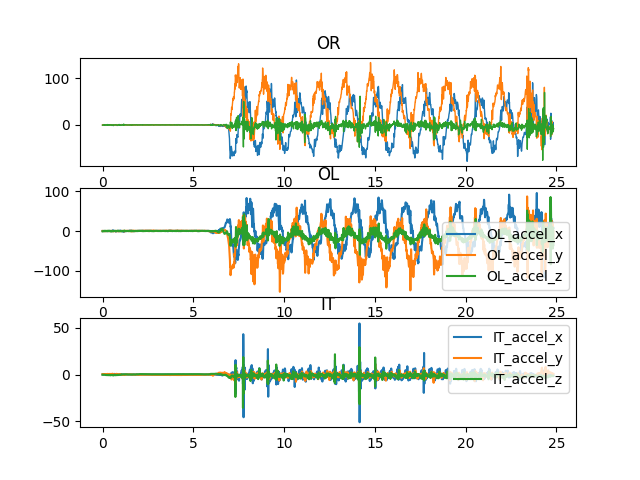

In [50]:
# Plotting raw acceleration data
%matplotlib widget

# ra: raw accelerations
fig_ra, ax_ra = plt.subplots(3)  # Creates a 3x1 grid of Axes

ax_ra[0].set_title('OR')
ax_ra[0].plot(time, OR_accel_x, label='OR_accel_x', linewidth=1)
ax_ra[0].plot(time, OR_accel_y, label='OR_accel_y', linewidth=1)
ax_ra[0].plot(time, OR_accel_z, label='OR_accel_z', linewidth=1)
# OR_accel_xy = np.sqrt(OR_accel_x**2+OR_accel_y**2)
# ax_ra[0].plot(time, OR_accel_xy, label='OR_accel_xy', linewidth=1)
# ax_ra[0].legend()

ax_ra[1].set_title('OL')
ax_ra[1].plot(time, OL_accel_x, label='OL_accel_x')
ax_ra[1].plot(time, OL_accel_y, label='OL_accel_y')
ax_ra[1].plot(time, OL_accel_z, label='OL_accel_z')
# OL_accel_xy = np.sqrt(OL_accel_x**2+OL_accel_y**2)
# ax_ra[1].plot(time, OL_accel_xy, label='OL_accel_xy')
ax_ra[1].legend()

ax_ra[2].set_title('IT')
ax_ra[2].plot(time, IT_accel_x, label='IT_accel_x')
ax_ra[2].plot(time, IT_accel_y, label='IT_accel_y')
ax_ra[2].plot(time, IT_accel_z, label='IT_accel_z')
# IT_accel_xy = np.sqrt(IT_accel_x**2+IT_accel_y**2)
# ax_ra[2].plot(time, IT_accel_xy, label='IT_accel_xy')
ax_ra[2].legend()

OR and OL accelerations period. accel_x and accel_z have same frequency. accel_y has double the frequency.

[be careful! how is the sensor oriented?] At the minimum value of az, that's the point when the sensor is being pushed up. Both sensors should read the same signal, but shifted. The shift can be adjusted by aligning the local minimza of az.

In [30]:
# Fixed basis
E1 = np.array([1,0,0])
E2 = np.array([0,1,0])
E3 = np.array([0,0,1])

def get_fixed_frame_acceleration(ax, ay, az, psi,theta,phi):

    n = np.size(psi)

    e1p = np.zeros((3,n))
    e2p = np.zeros((3,n))
    e3p = np.zeros((3,n))

    e1pp = np.zeros((3,n))
    e2pp = np.zeros((3,n))
    e3pp = np.zeros((3,n))

    e1 = np.zeros((3,n))
    e2 = np.zeros((3,n))
    e3 = np.zeros((3,n))

    a = np.zeros((3,n))

    for i in range(n):
        # First rotation by an angle psi about E3
        e1p[:,i] = np.cos(psi[i])*E1+np.sin(psi[i])*E2
        e2p[:,i] = -np.sin(psi[i])*E1+np.cos(psi[i])*E2
        e3p[:,i] = E3
        # Second rotation by an angle theta about e2p
        e1pp[:,i] = np.cos(theta[i])*e1p[:,i]-np.sin(theta[i])*e3p[:,i]
        e2pp[:,i] = e2p[:,i]
        e3pp[:,i] = np.sin(theta[i])*e1p[:,i]+np.cos(theta[i])*e3p[:,i]
        # Third rotation by an angle phi about e1pp
        e1[:,i] = e1pp[:,i]
        e2[:,i] = np.cos(phi[i])*e2pp[:,i]+np.sin(phi[i])*e3pp[:,i]
        e3[:,i] = -np.sin(phi[i])*e2pp[:,i]+np.cos(phi[i])*e3pp[:,i]
        # acceleration in fixed frame
        a[:,i] = ax[i]*e1[:,i]+ay[i]*e2[:,i]+az[i]*e3[:,i]
    # a = A1*E1+A2*E2+A3*E3
    Ax = a[0,:]
    Ay = a[1,:]
    Az = a[2,:]

    return Ax, Ay, Az

OR_Ax, OR_Ay, OR_Az = get_fixed_frame_acceleration(OR_accel_x, OR_accel_y, OR_accel_z, OR_psi, OR_theta, OR_phi)
OL_Ax, OL_Ay, OL_Az = get_fixed_frame_acceleration(OL_accel_x, OL_accel_y, OL_accel_z, OL_psi, OL_theta, OL_phi)
IT_Ax, IT_Ay, IT_Az = get_fixed_frame_acceleration(IT_accel_x, IT_accel_y, IT_accel_z, IT_psi, IT_theta, IT_phi)
IL_Ax, IL_Ay, IL_Az = get_fixed_frame_acceleration(IL_accel_x, IL_accel_y, IL_accel_z, IL_psi, IL_theta, IL_phi)
IB_Ax, IB_Ay, IB_Az = get_fixed_frame_acceleration(IB_accel_x, IB_accel_y, IB_accel_z, IB_psi, IB_theta, IB_phi)


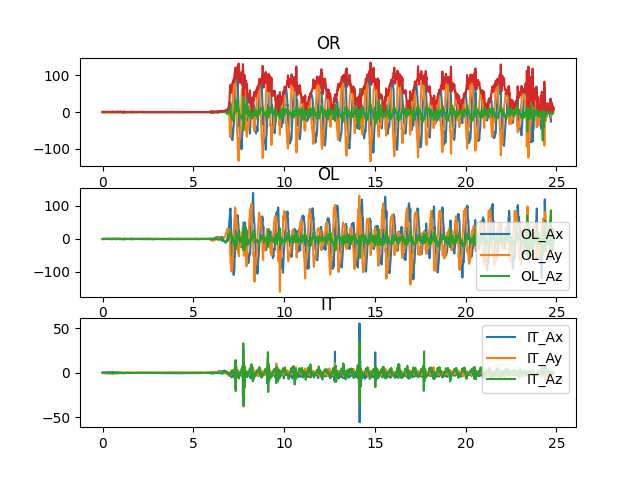

In [54]:
# Plotting raw acceleration data in fixed basis
%matplotlib widget

# ra: raw acceleriations
fig_ra, ax_ra = plt.subplots(3)  # Creates a 3x1 grid of Axes

ax_ra[0].set_title('OR')
ax_ra[0].plot(time, OR_Ax, label='OR_Ax')
ax_ra[0].plot(time, OR_Ay, label='OR_Ay')
ax_ra[0].plot(time, OR_Az, label='OR_Az')
OR_accel_xy = np.sqrt(OR_accel_x**2+OR_accel_y**2)
ax_ra[0].plot(time, OR_accel_xy, label='OR_accel_xy')
# ax_ra[0].legend()

ax_ra[1].set_title('OL')
ax_ra[1].plot(time, OL_Ax, label='OL_Ax')
ax_ra[1].plot(time, OL_Ay, label='OL_Ay')
ax_ra[1].plot(time, OL_Az, label='OL_Az')
# OL_Axy = np.sqrt(OL_Ax**2+OL_Ay**2)
# ax_ra[1].plot(time, OL_Axy, label='OL_Axy')
ax_ra[1].legend()

ax_ra[2].set_title('IT')
ax_ra[2].plot(time, IT_Ax, label='IT_Ax')
ax_ra[2].plot(time, IT_Ay, label='IT_Ay')
ax_ra[2].plot(time, IT_Az, label='IT_Az')
# IT_Axy = np.sqrt(IT_Ax**2+IT_Ay**2)
# ax_ra[2].plot(time, IT_Axy, label='IT_Axy')
ax_ra[2].legend()

We are detrending the results everytime we integrate. Explain why. Any effect on results?

In [32]:
OR_dx, OR_dy, OR_dz, OR_vx, OR_vy, OR_vz = get_position(time,OR_Ax, OR_Ay, OR_Az)
OL_dx, OL_dy, OL_dz, OL_vx, OL_vy, OL_vz = get_position(time,OL_Ax, OL_Ay, OL_Az)
IT_dx, IT_dy, IT_dz, IT_vx, IT_vy, IT_vz = get_position(time,IT_Ax, IT_Ay, IT_Az)
IL_dx, IL_dy, IL_dz, IL_vx, IL_vy, IL_vz = get_position(time,IL_Ax, IL_Ay, IL_Az)
IB_dx, IB_dy, IB_dz, IB_vx, IB_vy, IB_vz = get_position(time,IB_Ax, IB_Ay, IB_Az)

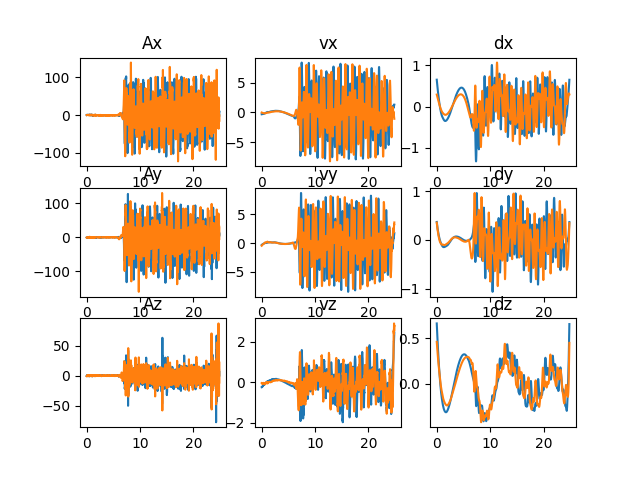

In [56]:
# Plot positions of two points on hoop
%matplotlib widget

fig, ax = plt.subplots(3, 3)  # Creates a 3x1 grid of Axes

# acceleration subplots
ax[0, 0].set_title('Ax')
ax[0, 0].plot(time, OR_Ax, label='OR_Ax')#, color='blue')
ax[0, 0].plot(time, OL_Ax, label='OL_Ax')#, color='orange')
# ax[0, 0].legend()

ax[1, 0].set_title('Ay')
ax[1, 0].plot(time, OR_Ay)
ax[1, 0].plot(time, OL_Ay)

ax[2, 0].set_title('Az')
ax[2, 0].plot(time, OR_Az)
ax[2, 0].plot(time, OL_Az)

# velocity subplots
ax[0, 1].set_title('vx')
ax[0, 1].plot(time[1:], OR_vx)
ax[0, 1].plot(time[1:], OL_vx)

ax[1, 1].set_title('vy')
ax[1, 1].plot(time[1:], OR_vy)
ax[1, 1].plot(time[1:], OL_vy)

ax[2, 1].set_title('vz')
ax[2, 1].plot(time[1:], OR_vz)
ax[2, 1].plot(time[1:], OL_vz)

# displacement subplots
ax[0, 2].set_title('dx')
ax[0, 2].plot(time[2:], OR_dx)
ax[0, 2].plot(time[2:], OL_dx)

ax[1, 2].set_title('dy')
ax[1, 2].plot(time[2:], OR_dy)
ax[1, 2].plot(time[2:], OL_dy)

ax[2, 2].set_title('dz')
ax[2, 2].plot(time[2:], OR_dz)
ax[2, 2].plot(time[2:], OL_dz)

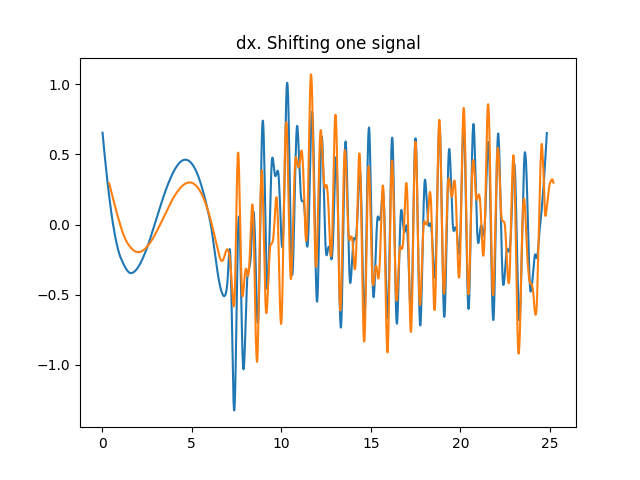

In [85]:
# Trying to align the two signals
%matplotlib widget

fig, ax = plt.subplots()  # Creates a 3x1 grid of Axes

ax.set_title('dx. Shifting one signal')
# ax.plot(time[2:], OR_dx,'.')
ax.plot(time[2:], OR_dx)
ax.plot(time[2:]+0.37, OL_dx)
# ax.plot(time[2:]+0.37,OL_dx,'.')


Text(0.5, 0.92, 'Hoop Sensor Displacement')

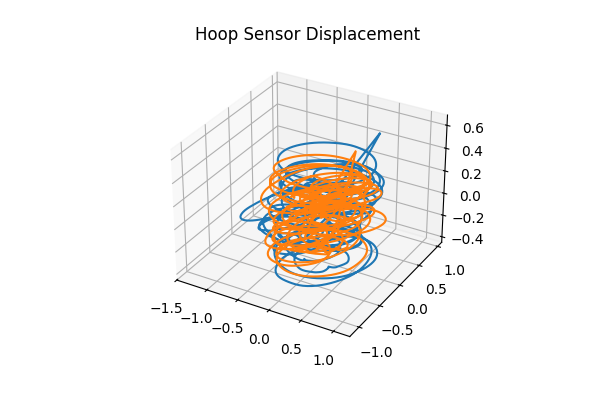

In [86]:
# 3D plot of hoop sensor displacement path
%matplotlib widget
fig_hooppath = plt.figure(figsize=(6,4))
ax = fig_hooppath.add_subplot(projection='3d')
ax.plot(OR_dx,OR_dy,OR_dz)
ax.plot(OL_dx,OL_dy,OL_dz)
ax.set_title('Hoop Sensor Displacement')

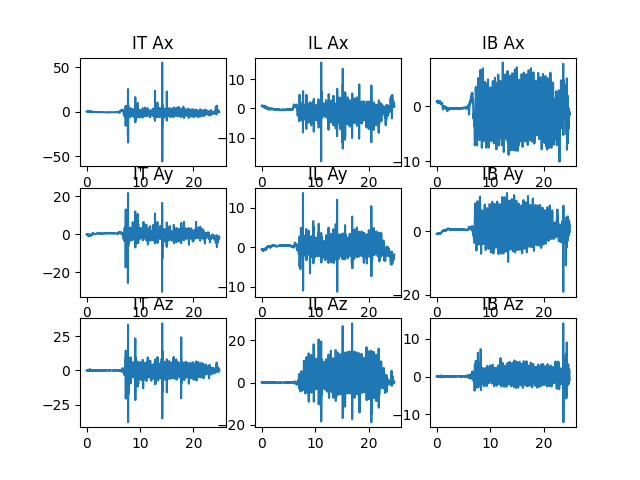

In [44]:
# Plot positions of hips
%matplotlib widget
fig_ahip, ax_ahip = plt.subplots(3, 3)  # Creates a 3x1 grid of Axes

# IT
ax_ahip[0, 0].set_title('IT Ax')
ax_ahip[0, 0].plot(time, IT_Ax)

ax_ahip[1, 0].set_title('IT Ay')
ax_ahip[1, 0].plot(time, IT_Ay)

ax_ahip[2, 0].set_title('IT Az')
ax_ahip[2, 0].plot(time, IT_Az)

# IL
ax_ahip[0, 1].set_title('IL Ax')
ax_ahip[0, 1].plot(time, IL_Ax)

ax_ahip[1, 1].set_title('IL Ay')
ax_ahip[1, 1].plot(time, IL_Ay)

ax_ahip[2, 1].set_title('IL Az')
ax_ahip[2, 1].plot(time, IL_Az)

# IB
ax_ahip[0, 2].set_title('IB Ax')
ax_ahip[0, 2].plot(time, IB_Ax)

ax_ahip[1, 2].set_title('IB Ay')
ax_ahip[1, 2].plot(time, IB_Ay)

ax_ahip[2, 2].set_title('IB Az')
ax_ahip[2, 2].plot(time, IB_Az)



One side of hip moves more (has more agressive bursts) than the other side. Verified by video?
Also for lower hip, most motion along Ay. See orientation of sensor to interpret.

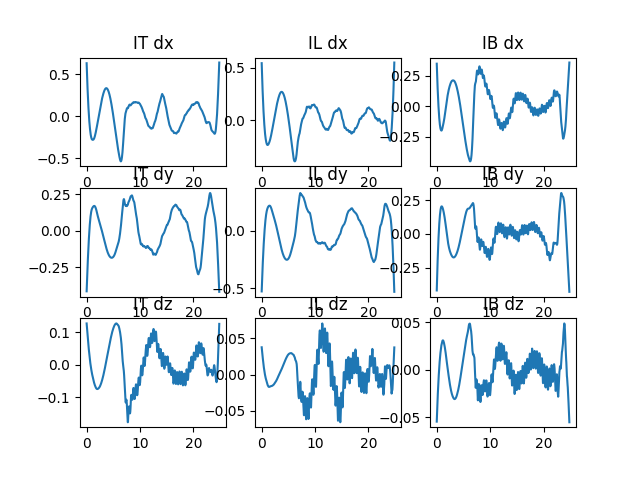

In [45]:
# Plot positions of hips
%matplotlib widget
fig_xhip, ax_xhip = plt.subplots(3, 3)  # Creates a 3x1 grid of Axes

# IT
ax_xhip[0, 0].set_title('IT dx')
ax_xhip[0, 0].plot(time[2:], IT_dx)

ax_xhip[1, 0].set_title('IT dy')
ax_xhip[1, 0].plot(time[2:], IT_dy)

ax_xhip[2, 0].set_title('IT dz')
ax_xhip[2, 0].plot(time[2:], IT_dz)

# IL
ax_xhip[0, 1].set_title('IL dx')
ax_xhip[0, 1].plot(time[2:], IL_dx)

ax_xhip[1, 1].set_title('IL dy')
ax_xhip[1, 1].plot(time[2:], IL_dy)

ax_xhip[2, 1].set_title('IL dz')
ax_xhip[2, 1].plot(time[2:], IL_dz)

# IB
ax_xhip[0, 2].set_title('IB dx')
ax_xhip[0, 2].plot(time[2:], IB_dx)

ax_xhip[1, 2].set_title('IB dy')
ax_xhip[1, 2].plot(time[2:], IB_dy)

ax_xhip[2, 2].set_title('IB dz')
ax_xhip[2, 2].plot(time[2:], IB_dz)



So interesting the jitters along dz for the upper hip and in all directions for lower hip. Maybe upper hip dz are needed to sustain hoop and lower hip jitters enables the upper hip to create these jitters. No jitters in upper hip in the horizontal plane. Look at human body anatomy to verify this.

Text(0.5, 0.92, 'Hip Sensor Displacement')

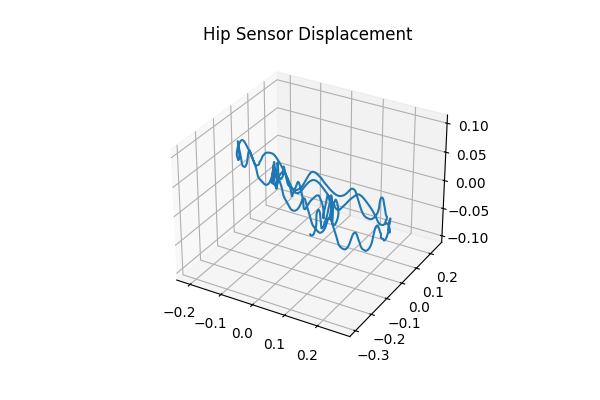

In [25]:
# 3D plot of hip sensor displacement path
%matplotlib widget
fig_hippath = plt.figure(figsize=(6,4))
ax = fig_hippath.add_subplot(projection='3d')
ax.plot(IT_dx[1000:2500],IT_dy[1000:2500],IT_dz[1000:2500])
ax.set_title('Hip Sensor Displacement')

Is it possible that the hip is displacing 20 cm along the vertical. Or is this vertical displacement an artifact of errors.

Text(0.5, 0.92, 'Hip Sensor Displacement')

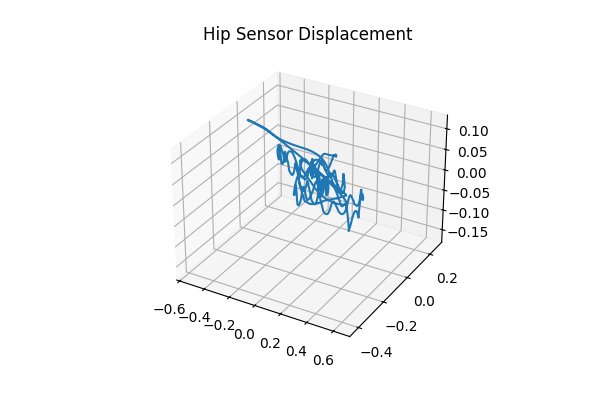

In [88]:
# 3D plot of hip sensor displacement path
%matplotlib widget
fig_hippath = plt.figure(figsize=(6,4))
ax = fig_hippath.add_subplot(projection='3d')
ax.plot(IT_dx,IT_dy,IT_dz)
ax.set_title('Hip Sensor Displacement')

Text(0.5, 0.92, 'All Sensor Displacement Paths')

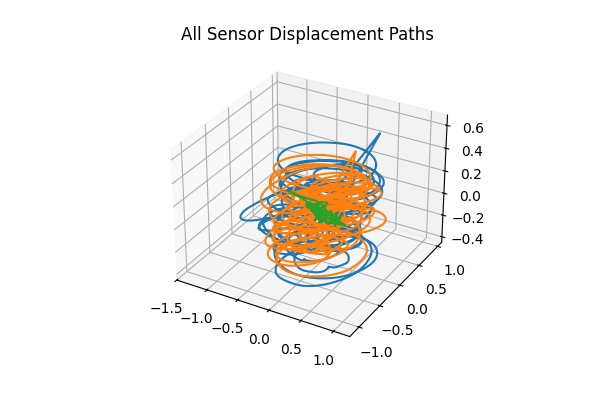

In [89]:
# On same plot
%matplotlib widget

# 3D plot of all sensor displacement paths

fig_paths = plt.figure(figsize=(6,4))
ax = fig_paths.add_subplot(projection='3d')
ax.plot(OR_dx,OR_dy,OR_dz, label='OR_sensor')
ax.plot(OL_dx,OL_dy,OL_dz, label='OR_sensor')
ax.plot(IT_dx,IT_dy,IT_dz, label='IT_sensor')
ax.set_title('All Sensor Displacement Paths')


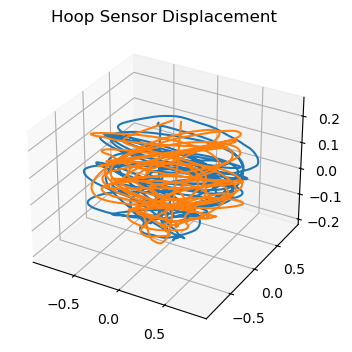

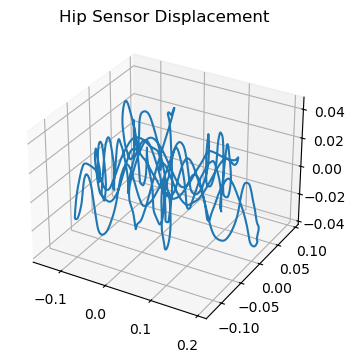

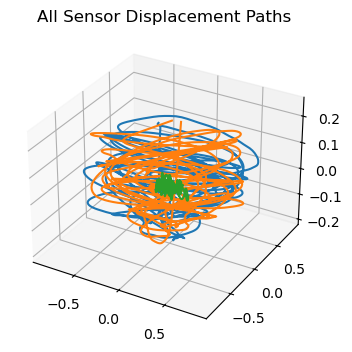

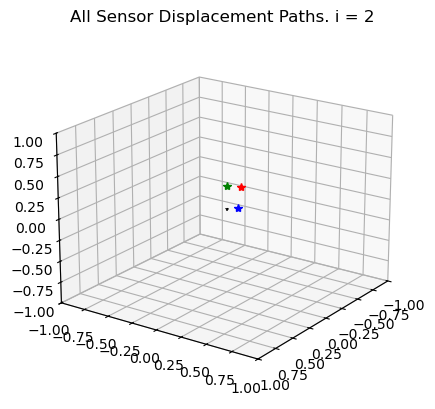

In [14]:
# Animation of sensor location in time
%matplotlib inline
# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=35)
ax.set_box_aspect([4, 4, 3])  # Adjust for box on

# Fixed basis vectors
ax.quiver(0, 0, 0, 0.01, 0, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0.01, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0, 0.01, linewidth=2, color='k')

ntime = np.size(OR_dx)

# Prepare video writer
writer = FFMpegWriter(fps=round(1/dt)//3)
with writer.saving(fig, "sensor_locations.mp4", dpi=200):

    max_range = 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    for i in range(2,ntime):

        ax.set_title(f"All Sensor Displacement Paths. i = {i}")

        marker_OR, = ax.plot(OR_dx[i], OR_dy[i], OR_dz[i],
                          marker='*', color='r', linewidth=2)
        marker_OL, = ax.plot(OL_dx[i], OL_dy[i], OL_dz[i],
                          marker='*', color='g', linewidth=2)
        marker_IT, = ax.plot(IT_dx[i], IT_dy[i], IT_dz[i],
                          marker='*', color='b', linewidth=2)

        plt.pause(0.001)
        writer.grab_frame()

        # Remove current frame's artists
        for artist in [marker_OR, marker_OL, marker_IT]:
            artist.remove()

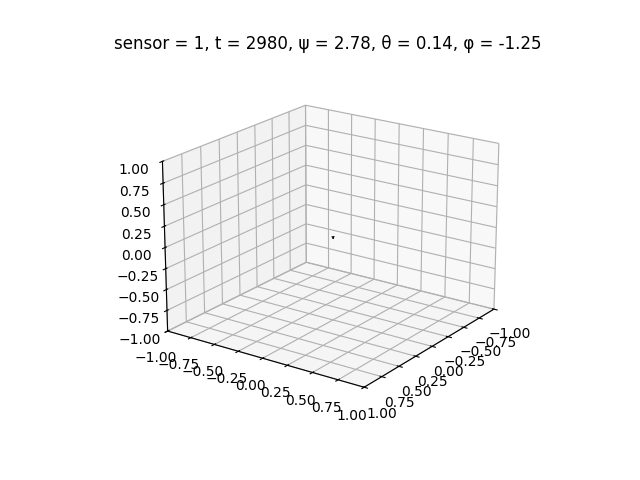

In [91]:
# Plotting hoop seperately from two sensor data on same plot
colors = ['k','b']

# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=35)
ax.set_box_aspect([4, 4, 3])  # Adjust for box on

max_range = 1
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# Fixed basis vectors
ax.quiver(0, 0, 0, 0.01, 0, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0.01, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0, 0.01, linewidth=2, color='k')

delta = np.linspace(0, 2 * np.pi, 100)
xC = np.zeros(3)  # center of hoop

psi = np.vstack((OL_psi, OR_psi)) 
theta = np.vstack((OL_theta, OR_theta)) 
phi = np.vstack((OL_phi, OR_phi)) 

wx = np.vstack((OL_wx, OR_wx)) 
wy = np.vstack((OL_wy, OR_wy)) 
wz = np.vstack((OL_wz, OR_wz)) 

OR_dx_padded = np.concatenate(([0, 0], OR_dx))
OR_dy_padded = np.concatenate(([0, 0], OR_dy))
OR_dz_padded = np.concatenate(([0, 0], OR_dz))
        
OR_vx_padded = np.concatenate(([0], OR_vx))
OR_vy_padded = np.concatenate(([0], OR_vy))
OR_vz_padded = np.concatenate(([0], OR_vz))

OL_dx_padded = np.concatenate(([0, 0], OL_dx))
OL_dy_padded = np.concatenate(([0, 0], OL_dy))
OL_dz_padded = np.concatenate(([0, 0], OL_dz))
        
OL_vx_padded = np.concatenate(([0], OL_vx))
OL_vy_padded = np.concatenate(([0], OL_vy))
OL_vz_padded = np.concatenate(([0], OL_vz))

dx = np.vstack((OR_dx_padded, OL_dx_padded)) 
dy = np.vstack((OR_dy_padded, OL_dy_padded)) 
dz = np.vstack((OR_dz_padded, OL_dz_padded)) 

vx = np.vstack((OR_vx_padded, OL_vx_padded)) 
vy = np.vstack((OR_vy_padded, OL_vy_padded)) 
vz = np.vstack((OR_vz_padded, OL_vz_padded)) 

nsensor = np.shape(psi)[0]
ntime = np.shape(psi)[1]

KE_hoop = np.zeros((nsensor,ntime))
PE_hoop = np.zeros((nsensor,ntime))

exp = np.zeros((3,nsensor,ntime))
eyp = np.zeros((3,nsensor,ntime))
ezp = np.zeros((3,nsensor,ntime))

expp = np.zeros((3,nsensor,ntime))
eypp = np.zeros((3,nsensor,ntime))
ezpp = np.zeros((3,nsensor,ntime))

ex = np.zeros((3,nsensor,ntime))
ey = np.zeros((3,nsensor,ntime))
ez = np.zeros((3,nsensor,ntime))

omega_hoop = np.zeros((3,nsensor,ntime))
vC = np.zeros((3,nsensor,ntime))

mark = [None] * nsensor
hoop = [None] * nsensor

# Prepare video writer
writer = FFMpegWriter(fps=round(1/dt)//3)
with writer.saving(fig, "hula_hoop_two_sensors.mp4", dpi=200):

    for t in range(ntime):

        for s in range(nsensor):
            # s == 0, sensor OR
            # s == 1, sensor OL

            # First rotation by an angle psi about E3
            exp[:,s,t] = np.cos(psi[s,t])*E1+np.sin(psi[s,t])*E2
            eyp[:,s,t] = -np.sin(psi[s,t])*E1+np.cos(psi[s,t])*E2
            ezp[:,s,t] = E3
            # Second rotation by an angle theta about e2p
            expp[:,s,t] = np.cos(theta[s,t])*exp[:,s,t]-np.sin(theta[s,t])*ezp[:,s,t]
            eypp[:,s,t] = eyp[:,s,t]
            ezpp[:,s,t] = np.sin(theta[s,t])*exp[:,s,t]+np.cos(theta[s,t])*ezp[:,s,t]
            # Third rotation by an angle phi about e1pp
            ex[:,s,t] = expp[:,s,t]
            ey[:,s,t] = np.cos(phi[s,t])*eypp[:,s,t]+np.sin(phi[s,t])*ezpp[:,s,t]
            ez[:,s,t] = -np.sin(phi[s,t])*eypp[:,s,t]+np.cos(phi[s,t])*ezpp[:,s,t]

            omega_hoop[:,s,t] = wx[s,t]*ex[:,s,t]+wy[s,t]*ey[:,s,t]+wz[s,t]*ez[:,s,t]

            vC[:,s,t] = np.array([vx[s,t],vy[s,t],vz[s,t]])+np.cross(omega_hoop[:,s,t],r*ey[:,s,t])

            KE_hoop[s,t] = 0.5*(Ixx*wx[s,t]**2+Iyy*wy[s,t]**2+Izz*wz[s,t]**2)+0.5*nsensor*np.linalg.norm(vC[:,s,t])**2
            PE_hoop[s,t] = nsensor*g*dz[s,t]

            ax.set_title(f"sensor = {s}, t = {t}, ψ = {psi[s,t]:.2f}, θ = {theta[s,t]:.2f}, φ = {phi[s,t]:.2f}")

            # # Blue vectors
            # e1p_plot = ax.quiver(0, 0, 0, *0.01*exp[:,s,t], linewidth=1, color='b')
            # e2p_plot = ax.quiver(0, 0, 0, *0.01*eyp[:,s,t], linewidth=1, color='b')
            # e3p_plot = ax.quiver(0, 0, 0, *0.01*ezp[:,s,t], linewidth=1, color='b')
            # 
            # # Red vectors
            # e1pp_plot = ax.quiver(0, 0, 0, *0.01*expp[:,s,t], linewidth=1, color='r')
            # e2pp_plot = ax.quiver(0, 0, 0, *0.01*eypp[:,s,t], linewidth=1, color='r')
            # e3pp_plot = ax.quiver(0, 0, 0, *0.01*ezpp[:,s,t], linewidth=1, color='r')

            # # Green vectors
            # e1_plot = ax.quiver(0, 0, 0, *0.01*ex[:,s,t], linewidth=1, color='g')
            # e2_plot = ax.quiver(0, 0, 0, *0.01*ey[:,s,t], linewidth=1, color='g')
            # e3_plot = ax.quiver(0, 0, 0, *0.01*ez[:,s,t], linewidth=1, color='g')


            # # Circle
            # xCircle = np.zeros((100, 3))
            xC = r*ey[:,s,t]+np.array([dx[s,t],dy[s,t],dz[s,t]])
        #     for j in range(100):
        #         xCircle[j, :] = xC + r * (np.cos(delta[j]) * ex[:,s,t] + np.sin(delta[j]) * ey[:,s,t])

        #     mark[s], = ax.plot([xCircle[0, 0]], [xCircle[0, 1]], [xCircle[0, 2]],
        #                     marker='*', color='r', linewidth=2)
        #     hoop[s], = ax.plot(xCircle[:, 0], xCircle[:, 1], xCircle[:, 2],
        #                     '.', color=colors[s], linewidth=2)

        # plt.pause(0.001)
        # writer.grab_frame()

        # # Remove current frame's artists
        # for s in range(nsensor):
        #     mark[s].remove()
        #     hoop[s].remove()
        # for artist in [e1p_plot, e2p_plot, e3p_plot,
        #             e1pp_plot, e2pp_plot, e3pp_plot,
        #             e1_plot, e2_plot, e3_plot]:
        #     artist.remove()

# total energy of hoop
E_hoop = KE_hoop+PE_hoop


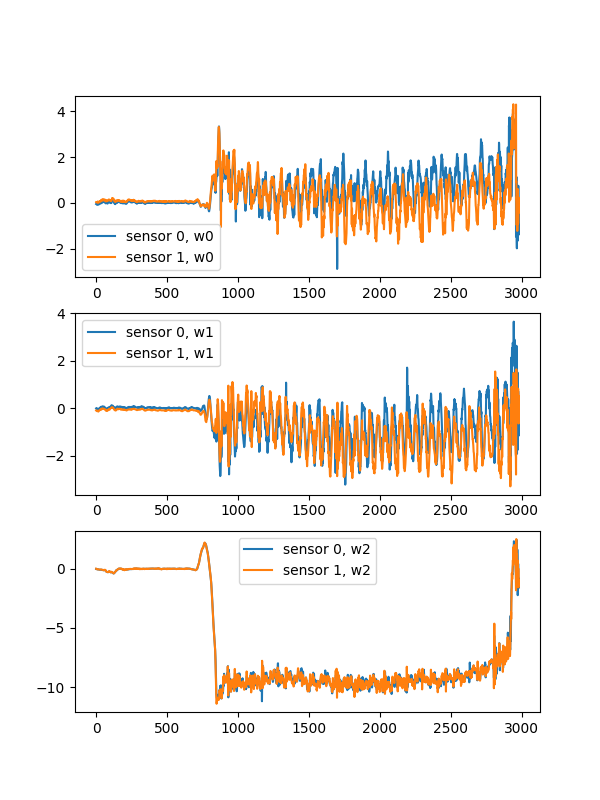

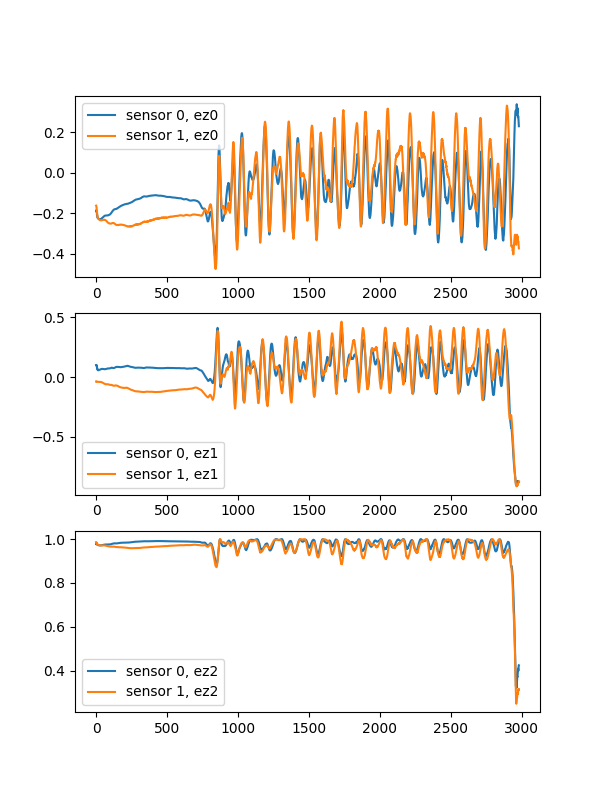

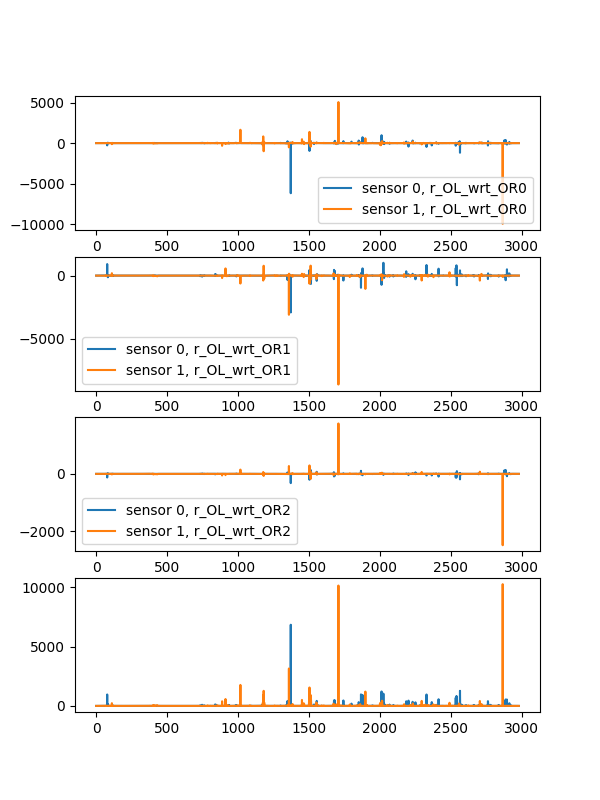

In [100]:
# Comparing data from the two sensors
# Measures of rigidity

# Angular velocities
fig_w, ax_w = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_w[i].plot(omega_hoop[i,s,:],label=f'sensor {s}, w{i}') 
        ax_w[i].legend()

# Unit vector ez
fig_ez, ax_ez = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_ez[i].plot(ez[i,s,:],label=f'sensor {s}, ez{i}') 
        ax_ez[i].legend()

# Calculating the relative position vector between the two sensors
# https://chatgpt.com/share/687ff75c-b810-8011-bd51-12152ce2bfab

fig_r, ax_r = plt.subplots(4,1,figsize=(6, 8))

r_OL_wrt_OR = np.zeros((3,nsensor,ntime))
norm_r_OL_wrt_OR = np.zeros((nsensor,ntime))

for t in range(ntime-1):
    temp1 = np.array([OL_vx[t], OL_vy[t], OL_vz[t]])-np.array([OR_vx[t], OR_vy[t], OR_vz[t]])
    for s in range(nsensor):
        temp2 = np.cross(omega_hoop[:,s,t],temp1)/(np.linalg.norm(temp1)**2)
        k = -np.dot(temp2,ez[:,s,t])/(np.dot(temp1,ez[:,s,t]))
        r_OL_wrt_OR[:,s,t] = temp2+k*temp1
        norm_r_OL_wrt_OR[s,t] = np.linalg.norm(r_OL_wrt_OR[:,s,t])

for s in range(nsensor):
    for i in range(3):
        ax_r[i].plot(r_OL_wrt_OR[i,s,:],label=f'sensor {s}, r_OL_wrt_OR{i}') 
        ax_r[i].legend()
    ax_r[3].plot(norm_r_OL_wrt_OR[s,:],label=f'sensor {s}, norm(r_OL_wrt_OR)') 




In [ ]:
# Plot Energies
fig_E, ax_E = plt.subplots()

# ax_E.plot(time, KE_hoop, label='KE-hoop')
ax_E.plot(time, PE_hoop, label='PE-hoop')
# ax_E.plot(time, E_hoop, label='E-hoop')
ax_E.legend()
